In [1]:
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assignment 03

## 1. Bias-Variance Trade-off

### 1.1.
Only from looking at the plotted data, which degree of a polynomial would be your best guess that would fit the data without over- or underfitting it? Why?

3rd degree, because of the 2 picks = two parabola curves.

### 1.2.
Predict how the bias and variance (high / low) and fit (under / over) would be for:
* A constant model (i.e. a horizontal line)
* A linear model
* A polynomial model of degree 10

### 1.3.
Use `numpy` to load the two splits of the dataset

In [3]:
data_train = np.loadtxt("data_train.csv", delimiter=",")
x_train = np.array(data_train[:, 0])  # Take input slice from data_train
y_train = np.array(data_train[:, -1])  # Take target slice from data_train

data_test = np.loadtxt("data_test.csv", delimiter=",")
x_test = np.array(data_test[:, 0])  # Take input slice from data_test
y_test = np.array(data_test[:, -1])  # Take target slice from data_test

print(x_test)

[0.74122087 2.22284335 2.9678447  3.58576699 4.51884756 4.96646804
 5.77949998 6.49623313 7.29616634 7.83982971]


and use `matplotlib` to recreate the plot from Figure 1.

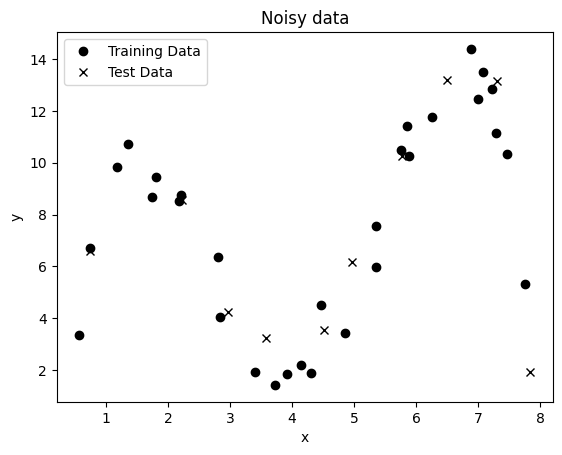

In [4]:
fig, ax = plt.subplots()
# Plot the training data
ax.plot(x_train, y_train, marker="o", mfc="black", mec="black", linestyle="", label="Training Data")
# Plot the testing data
ax.plot(x_test, y_test, marker="x", mec="black", linestyle="", label="Test Data")

# Don't forget to annotate your plots!
# (axes labels, title, legend, units, etc.)
ax.set_title("Noisy data")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

### 1.4. 
Using the `sklearn.linear_model.LinearRegression` class, fit a linear model to the data in the `data_train.csv` file.

Compute the MSE error for the data in `data_test.csv` and plot the predicted line together with the original data.

Mean Squared Error: [14.78091269]


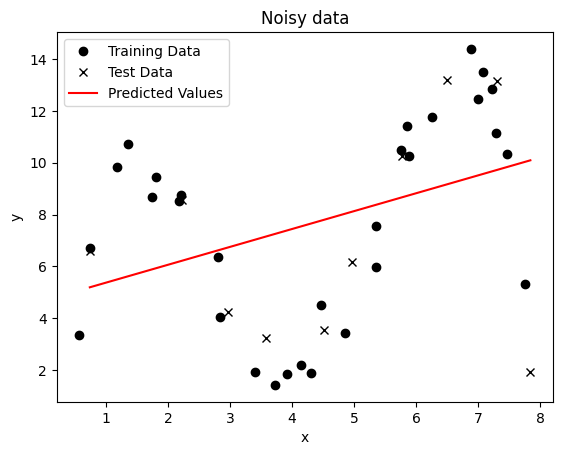

In [5]:
model = LinearRegression()  # Create a linear regression model

# Fit the model to the training data (idk why python says to reshape)
# find the best param to minimize the error
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
pred = model.predict(x_test.reshape(-1, 1))  # Predict the testing data
# print(pred)

fig, ax = plt.subplots()
# Plot the training data
ax.plot(x_train, y_train, marker="o", mfc="black", mec="black", linestyle="", label="Training Data")
# Plot the testing data
ax.plot(x_test, y_test, marker="x", mec="black", linestyle="", label="Test Data")
# Plot predicted
ax.plot(x_test, pred, color="red", label="Predicted Values")

ax.set_title("Noisy data")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

# Calculate the mean squared error between the predictions and the
# testing data targets
res = 0
temp = zip(y_test, pred)
for y_is, y_hats in temp:
    res += (y_is - y_hats) ** 2

mse = 1 / len(y_test) * res
print(f"Mean Squared Error: {mse}")

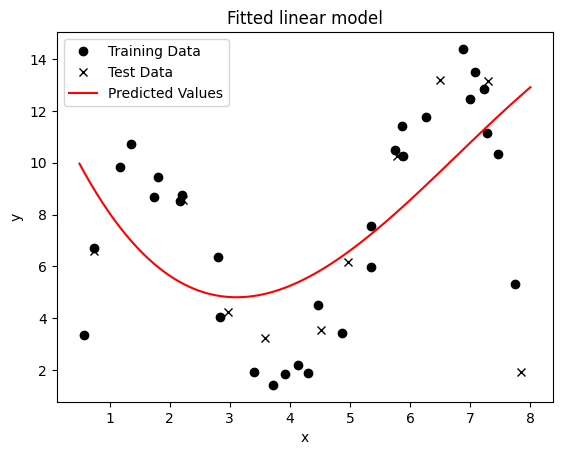

In [6]:
# from scipy.optimize import curve_fit

# Generate points to plot the curve of the model
# 100 equally spaced points between 0.5 and 8
full_x = np.linspace(0.5, 8, 100)[:, np.newaxis]

# Fit the new model1 to the curve (inputs are powered to 3rd grade)
poly_features = PolynomialFeatures(degree=3)
x_train_poly = poly_features.fit_transform(x_train.reshape(-1, 1))
model1 = LinearRegression()
model1.fit(x_train_poly, y_train)

# Predict the output values for the curve
full_x_poly = poly_features.fit_transform(full_x.reshape(-1, 1))
y_curve = model1.predict(full_x_poly)

fig, ax = plt.subplots()
# Plot the training data
ax.plot(x_train, y_train, marker="o", mfc="black", mec="black", linestyle="", label="Training Data")
# Plot the testing data
ax.plot(x_test, y_test, marker="x", mec="black", linestyle="", label="Test Data")
# Plot the model curve
ax.plot(full_x, y_curve, color="red", label="Predicted Values")

ax.set_title("Fitted linear model")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

### 1.5.
Create a class that can fit a polynomial model of an arbitrary degree. For example `m = PolynomialModel(degree=23)`.

Include a `fit(x_train, y_train)` method for fitting some training data and a `predict(x)` method for performing inference for the values of unseen data.

**Hint:** You can use `sklearn.linear_model.LinearRegression` and
`sklearn.preprocessing.PolynomialFeatures` together to define non-linear models by combining a linear model with basis functions.

In [7]:
class PolynomialModel:
    """" Class for polynomial regression.
    
    This class fits a polynomial regression model to a given
    training dataset by using a linear model combined with a
    polynomial feature transformation (basis function).
    """

    def __init__(
            self,
            degree: int
    ) -> None:
        """Constructor.
        
        Parameters:
            degree : int
                The degree of the polynomial model.
        """
        self.degree = degree

        # Create polynomial feature transformer
        self.poly_feature_transf = PolynomialFeatures(degree=self.degree)

        # Create linear regression model
        self.model = LinearRegression()
    
    def fit(
            self,
            x_train: np.ndarray,
            y_train: np.ndarray
    ) -> "PolynomialModel":
        """Fit the polynomial model to the training data.

        Parameters:
            x_train : np.ndarray[d, f]
                The input features of the training data with d samples
                and f features.
            y_train : np.ndarray[d]
                The target values of the training data with d samples.
        
        Returns:
            self : PolynomialModel
                The fitted model.
        """

        # Transform the input features
        x_train_transformed = self.poly_feature_transf.fit_transform(x_train.reshape(-1, 1))
        # Fit the linear model to the transformed features and
        self.model.fit(x_train_transformed, y_train)
        # target values
        ...

        return self

    def predict(
            self,
            x: np.ndarray
    ) -> np.ndarray:
        """Predict the target values for the given input features.

        Args:
            x: np.ndarray[d, f]
                The input features to predict the target values for with
                d samples and f features.

        Returns:
            pred: np.ndarray[d]
                The predicted target values with d samples.
        """
        
        # Transform the input features
        x_tranformed = self.poly_feature_transf.fit_transform(x.reshape(-1, 1))
        # Predict the target values
        pred = self.model.predict(x_tranformed)
    
        return pred

Using your class, fit models with $\mathit{degrees} \in \{0, 1, 2, 3, 4, 5, 20\}$ and plot the fitted curves along with the original data.

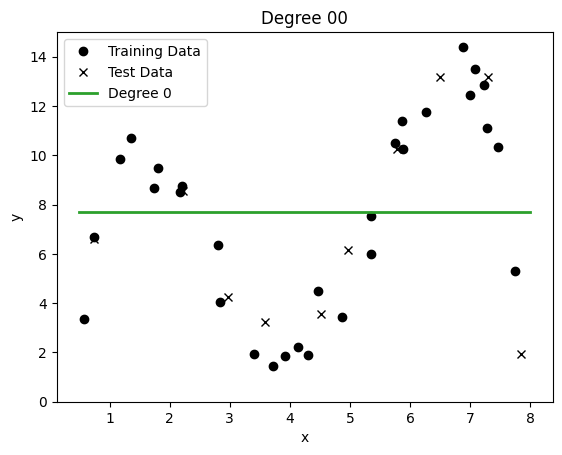

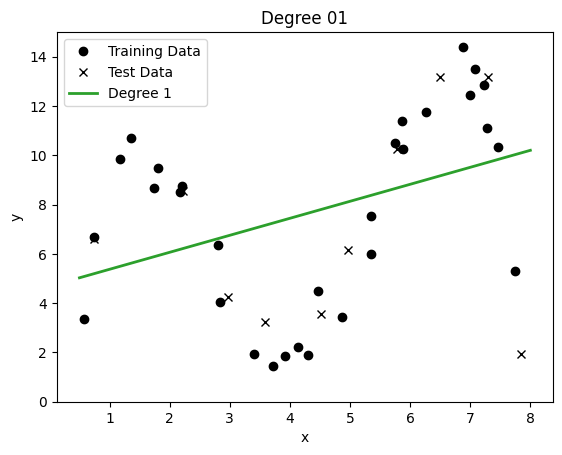

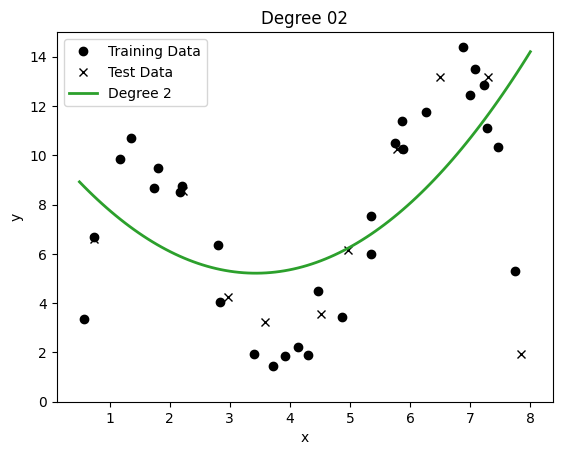

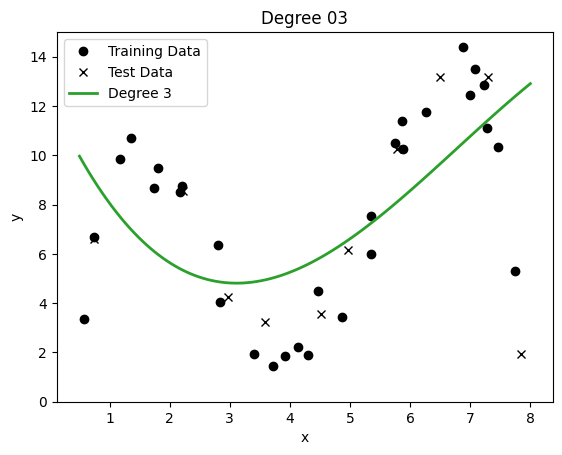

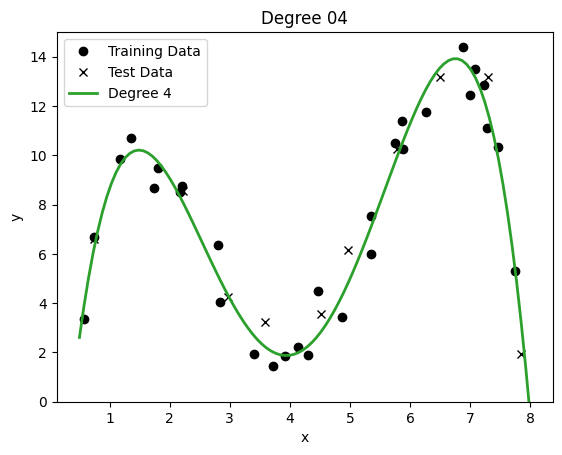

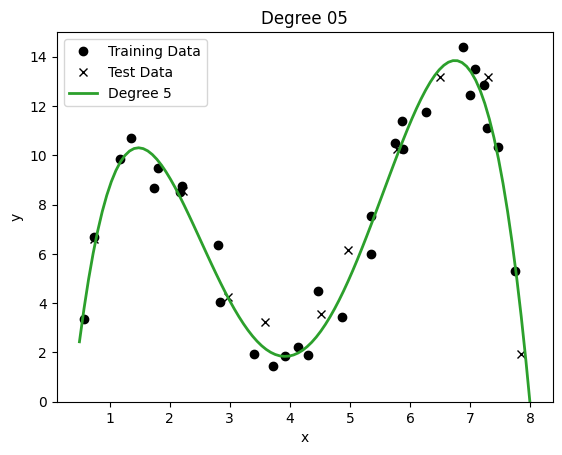

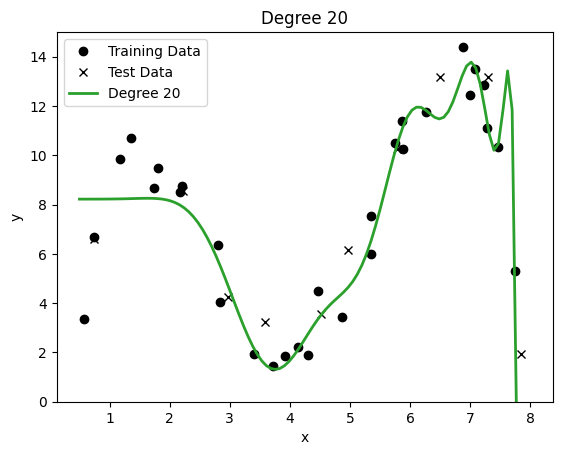

In [8]:
# Create a PolynomialModel object for each degree
models = {d: PolynomialModel(d) for d in [0, 1, 2, 3, 4, 5, 20]}
# x_full = np.linspace(-1, 6, 100)

for d, model in models.items():
    fig, ax = plt.subplots()

    # Plot the training data
    ax.plot(x_train, y_train, marker="o", mfc="black", mec="black", linestyle="", label="Training Data")
    # Plot the testing data
    ax.plot(x_test, y_test, marker="x", mec="black", linestyle="", label="Test Data")

    # TODO: Fit a model to the training data
    model.fit(x_train, y_train)

    # TODO: Predict on the x_full values to generate the model's curve
    # poly_feat = PolynomialFeatures(degree=d)
    y_full = model.predict(full_x.reshape(-1, 1))
    y_full = y_full.flatten()

    # TODO: Plot the curve
    ax.plot(full_x, y_full, label=f'Degree {d}', linewidth=2)

    ax.set_title(f"Degree {d:02d}")
    ax.set_ylim(0, 15)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()

### 1.6.

Create a function `measure_bias_var_mse(model, x_train, y_train, x_test, y_test, n)` that _estimates_ the bias, variance and, mean square error of different models.

In [9]:
def sample_with_replacement(
        x: np.ndarray,
        y: np.ndarray
    ) -> tuple[np.ndarray, np.ndarray]:
    """Auxiliary function to sample with replacement.

    Parameters:
        x : np.ndarray[d, f]
            A dataset with d points and f features.

        y : np.ndarray[d]
            Targets corresponding to the inputs of the dataset.
    
    Returns:
        x_sampled : np.ndarray[d, f]
            A sampled dataset with d points and f features.

        y_sampled : np.ndarray[d]
            Targets corresponding to the inputs of the sampled dataset.
    """

    # Implement the sampling with replacement
    sample_idx = np.random.choice(len(x), size=len(x), replace=True)

    # print(sample_idx)
    return x[sample_idx], y[sample_idx]

# print(x_train)
# print(y_train)
# print(sample_with_replacement(x_train, y_train))

In [10]:
def measure_bias_var_mse(
    model,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray,
    n: int = 200,
) -> tuple[float, float, float]:
    """Measures the bias, variance and MSE of a model.

    Parameters:
        model: Any
            A model object with fit() and predict() methods.

        x_train: np.ndarray[d, f] or np.ndarray[d]
            A training dataset with d points and f features to be sampled
            with replacement to measure the bias-variance.

        y_train: np.ndarray[d]
            Targets corresponding to the inputs of the training dataset.

        x_test : np.ndarray[d_test, f] or np.ndarray[d_test]
            The test dataset for computing the average loss, bias, and variance.

        y_test : np.ndarray[d_test]
            Targetscorresponding to the inputs of the test dataset.

        n: int (Default=200)
            Number of sampling rounds to measure the bias-varias.
            Each sampled dataset has the same size as the original training set.
    
    Returns:
        avg_bias: float
            The average bias over the test dataset.
        avg_var: float
            The average variance over the test dataset.
        mse: float
            The average expected loss over the test dataset.
    """

    # Array for storing the predictions of each model
    all_pred = np.zeros((n, y_test.shape[0]), dtype=np.float64)

    # sklearn expects 2D inputs
    if x_train.ndim == 1:
        x_train = x_train[:, np.newaxis]
    if x_test.ndim == 1:
        x_test = x_test[:, np.newaxis]

    # Bootstrap sampling to generate n models
    for i in range(n):
        # Sample dataset with replacement
        x_boot, y_boot = sample_with_replacement(x_train, y_train)

        # Fit the model to the sampled dataset
        model = PolynomialModel(3)
        # model.fit(x_boot[i], x_train)
        model.fit(x_boot, y_boot)

        # Predict on the test set and store in the all_pred array
        pred = model.predict(x_test.reshape(-1, 1))
        all_pred[i, :] = pred  # or pred.flatten()

    # Calculate the expected prediction model == average of predictions
    mean_pred = np.mean(all_pred, axis=0)
    
    # Calculate the bias and variance
    # -f = average of f^ = mean_pred
    bias = np.mean((mean_pred - y_test)**2)
    var = np.mean(mean_pred - pred)

    # TODO: Calculate the mean squared error
    mse = float(np.mean((pred - y_test)**2))

    return bias, var, mse

# model = PolynomialModel(3)
# measure_bias_var_mse(model, x_train, y_train, x_test, y_test)

### 1.7
Using your function for estimating the MSE, bias and variance, compute them for models with $\mathit{degrees} \in \{0,\, 1,\, \dots,\, 10\}$.

In [11]:
# Create a PolynomialModel object for each degree
models = {d: PolynomialModel(d) for d in range(10)}

# Measure the bias, variance, and MSE for each model
results = {d: measure_bias_var_mse(model, x_train, y_train, x_test, y_test) for d, model in models.items()}
print(results)

{0: (18.2226535124123, -0.40312158110496127, 22.145402239972572), 1: (16.775220098243462, 0.002103372744219634, 15.950514199343766), 2: (17.829747065170356, 0.141537587782405, 15.97723817318853), 3: (17.35190193929306, -0.18989874145391844, 31.143871581162593), 4: (17.129300718353083, -0.3907739429265954, 13.933175239826719), 5: (16.71593398155856, -0.9239358601664405, 40.12664608050647), 6: (16.553117532347944, 0.6487834953351351, 13.132881647531335), 7: (17.207474479112353, -0.4167231897557194, 24.4387069516018), 8: (17.388686641342797, -0.5241430243230628, 35.80772621796361), 9: (17.29214278650416, -0.31891499184924577, 34.926539780443264)}


Generate a plot of  the MSE, bias and variance, where the $x$ axis represents the degrees of the polynomial model, and the $y$ axis are the estimated metrics.

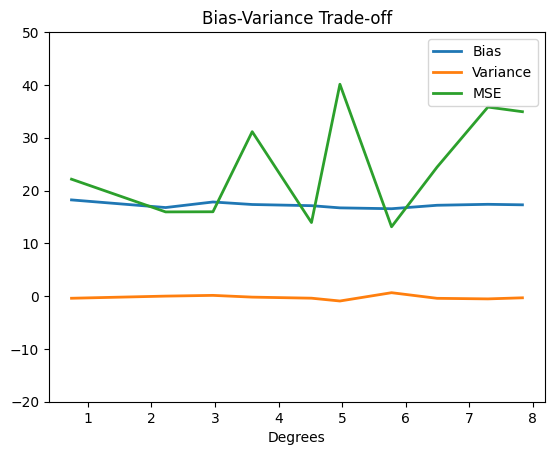

In [12]:
fig, ax = plt.subplots()
bias_vals = []
var_vals = []
mse_vals = []

for i in results.values():
    bias_vals.append(i[0])
    var_vals.append(i[1])
    mse_vals.append(i[2])

# TODO: Plot the Bias
ax.plot(x_test, bias_vals, linewidth=2, label="Bias")
# TODO: Plot the Variance
ax.plot(x_test, var_vals, linewidth=2, label="Variance")
# TODO: Plot the MSE
ax.plot(x_test, mse_vals, linewidth=2, label="MSE")

ax.set_xlabel("Degrees")
ax.set_title(f"Bias-Variance Trade-off")
ax.set_ylim(-20, 50)
ax.legend()

Do the computed values and plot match your predictions from question 1.2.?